In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

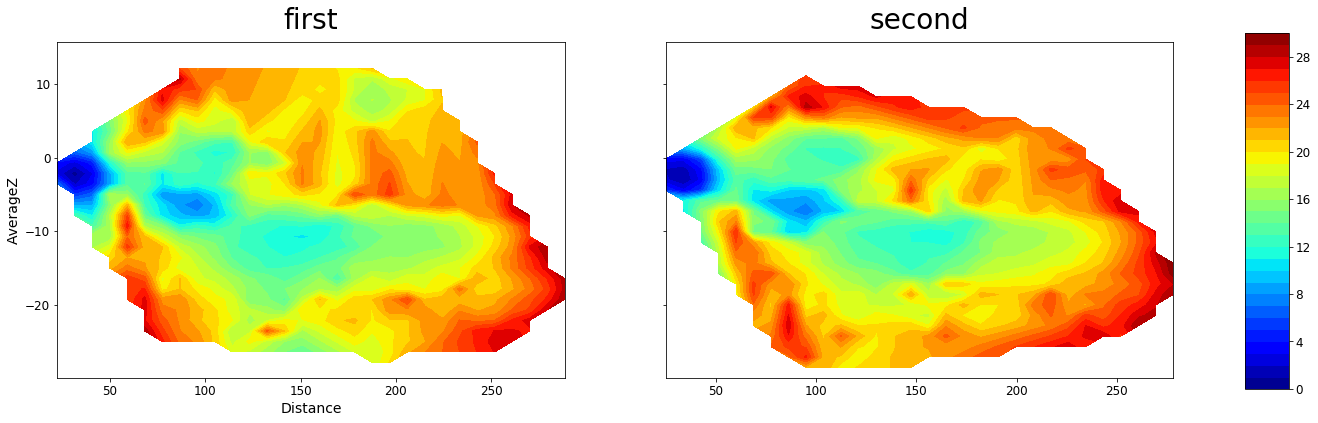

In [263]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/second_half/_280-350/2d_zAverage_dis/force_0.1/"
location1 = location + f"perturbation-1-pmf-{temp}.dat"
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/first_half/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
plot2d_side_by_side(location1, location2, xlabel="Distance", ylabel="AverageZ", title1="first", title2="second")
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/convergence_2d.png")

(-25, 10)

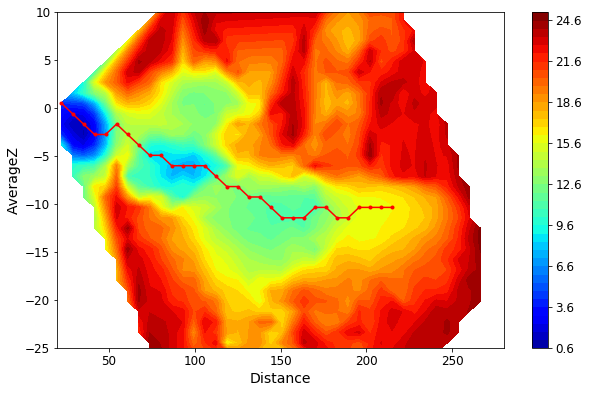

In [266]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 370
location = pre + "/combined/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(28,0),save=False, plot1d=0, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.xlim([20,280])
plt.ylim([-25,10])

(-25, 10)

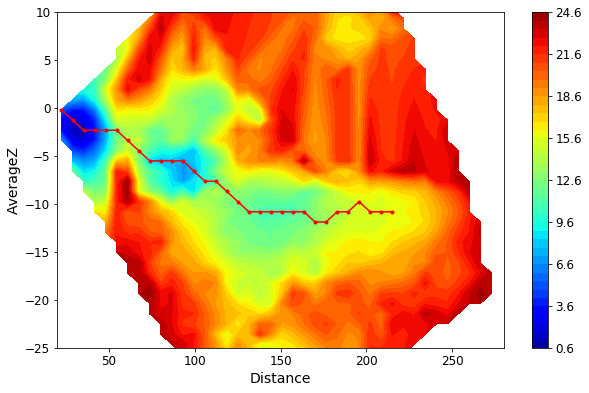

In [269]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/second_half/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
zmax=25
res=40
path_origin_second, f_origin_second = shortest_path_2(location2, start=(16, 30), end=(26,0), title="second_half_AverageZ_Dis",save=False, plot1d=0, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.xlim([20,280])
plt.ylim([-25,10])

(-25, 10)

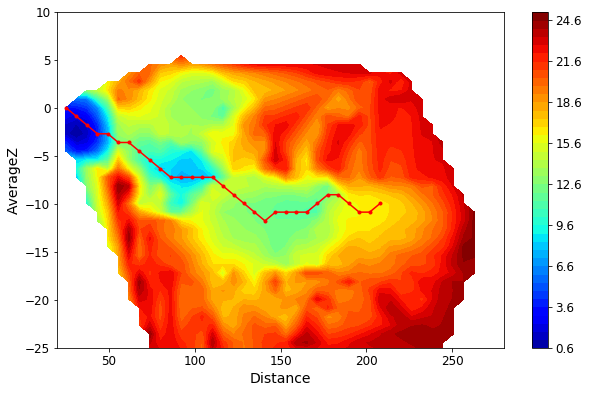

In [271]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/first_half/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
zmax=25
res=40
path_origin_first, f_origin_first = shortest_path_2(location2, start=(22, 30), end=(33,0), title="first_half_AverageZ_Dis",save=False, plot1d=0, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.xlim([20,280])
plt.ylim([-25,10])

In [273]:
len(f_origin_second)

31

In [274]:
len(f_origin_first)

31

In [275]:
len(f_origin)

31

In [283]:
x_on_path = np.array(path_origin)
d = pd.DataFrame(data={"x":x_on_path, "y":f_origin})
# mean the dupliation
d = d.groupby("x").mean().reset_index().values
x_smooth = np.linspace(d[:,0].min(), d[:,0].max(), 200)
spl = scipy.interpolate.interp1d(d[:,0], d[:,1], kind="cubic")

In [284]:
x_on_path = np.array(path_origin_first)
d = pd.DataFrame(data={"x":x_on_path, "y":f_origin_first})
# mean the dupliation
d = d.groupby("x").mean().reset_index().values
x_smooth_first = np.linspace(d[:,0].min(), d[:,0].max(), 200)
spl_first = scipy.interpolate.interp1d(d[:,0], d[:,1], kind="cubic")

In [285]:
x_on_path = np.array(path_origin_second)
d = pd.DataFrame(data={"x":x_on_path, "y":f_origin_second})
# mean the dupliation
d = d.groupby("x").mean().reset_index().values
x_smooth_second = np.linspace(d[:,0].min(), d[:,0].max(), 200)
spl_second = scipy.interpolate.interp1d(d[:,0], d[:,1], kind="cubic")

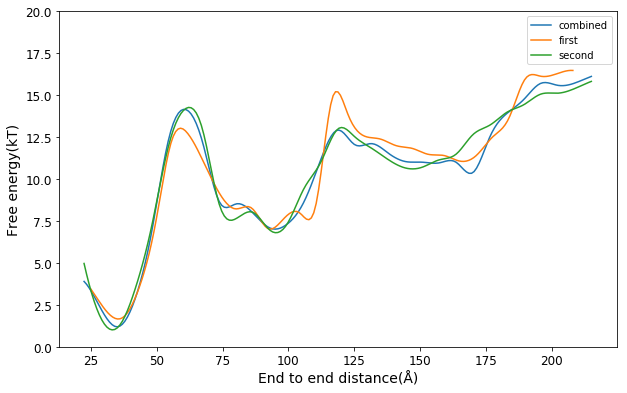

In [287]:
plt.plot(x_smooth, spl(x_smooth), label="combined")
plt.plot(x_smooth_first, spl_first(x_smooth_first), label="first")
plt.plot(x_smooth_second, spl_second(x_smooth_second), label="second")
plt.legend()
plt.ylim(0,20)
plt.xlabel("End to end distance(Å)")
plt.ylabel("Free energy(kT)")
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/convergence_1d.png")

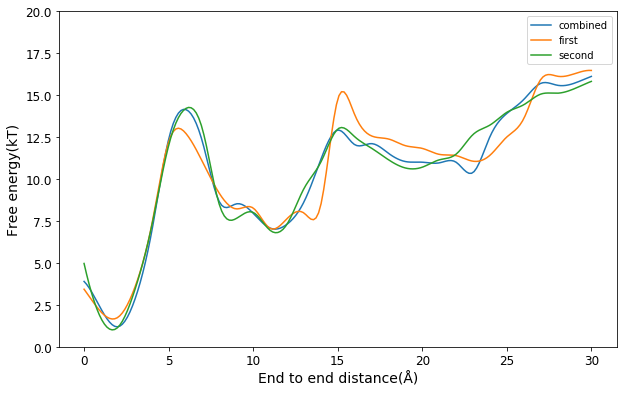

In [276]:
plt.plot(x_smooth, spl(x_smooth), label="combined")
plt.plot(x_smooth, spl_first(x_smooth), label="first")
plt.plot(x_smooth, spl_second(x_smooth), label="second")
plt.legend()
plt.ylim(0,20)
plt.xlabel("End to end distance(Å)")
plt.ylabel("Free energy(kT)")
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/convergence_1d.png")

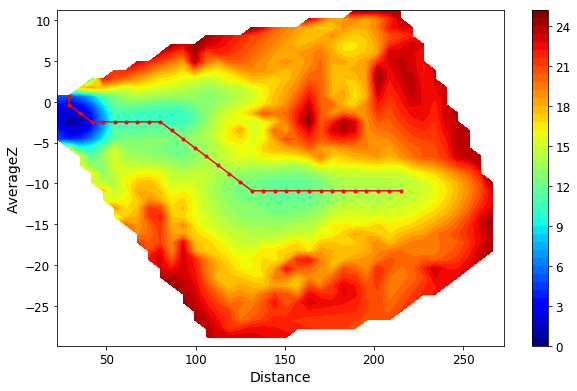

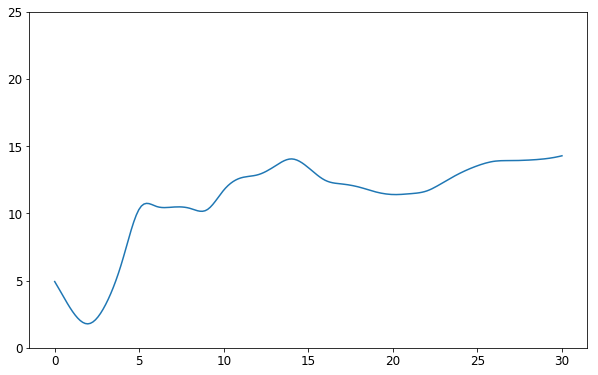

In [173]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 330
location = pre + "/combined/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

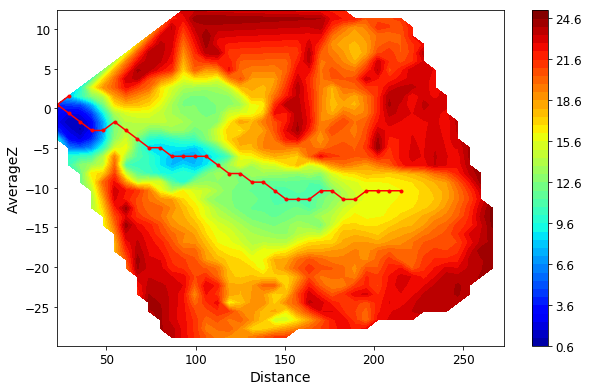

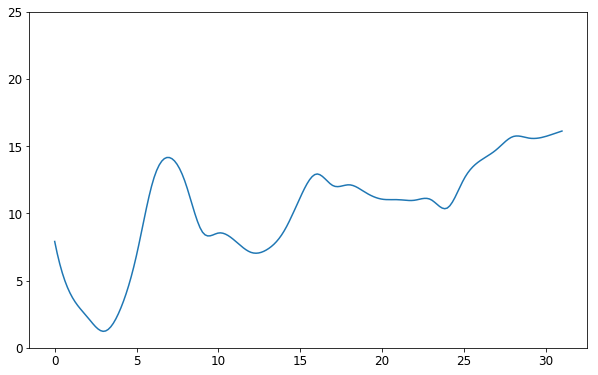

In [150]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 370
location = pre + "/combined/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

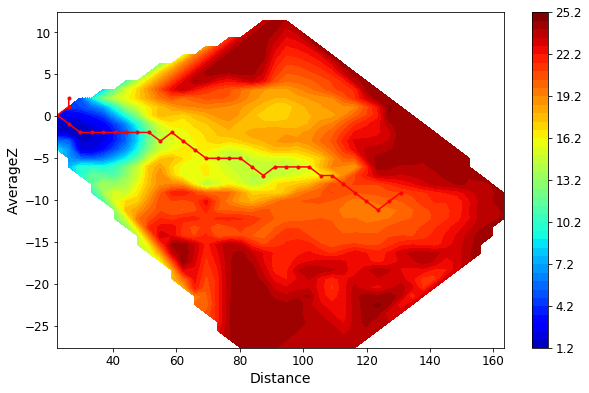

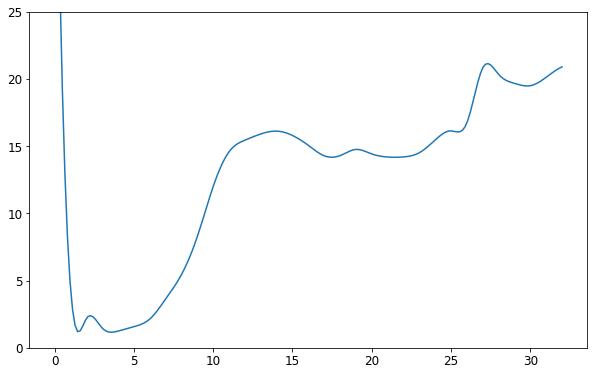

In [3]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 390
location = pre + "/combined/_280-350/2d_zAverage_dis/force_0.0/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

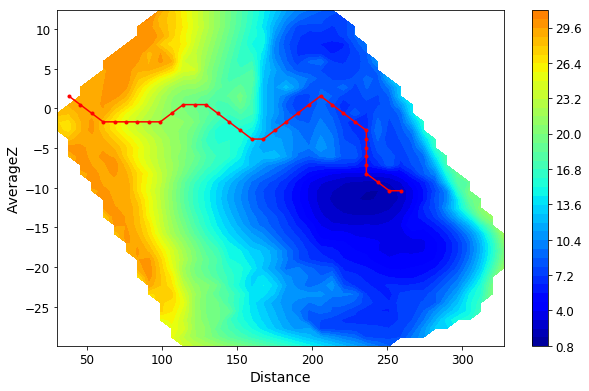

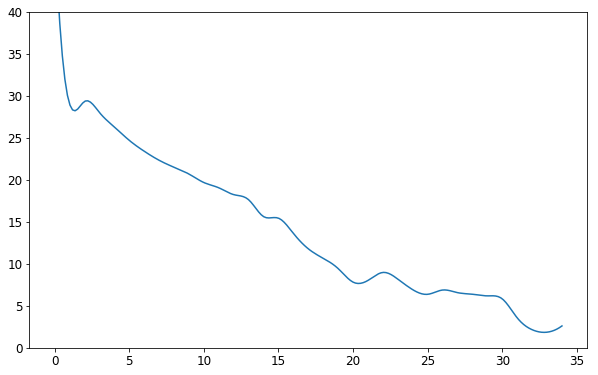

In [4]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 360
location = pre + "/combined/_280-350/2d_zAverage_dis/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
zmax=40
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

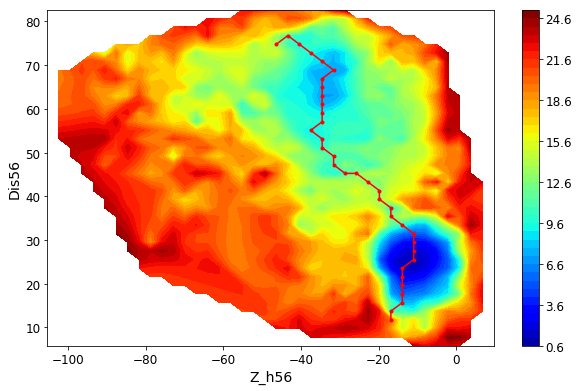

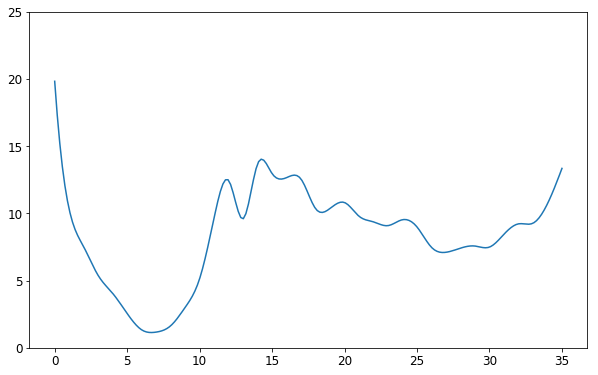

In [11]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/56_z_dis/force_0.1/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(35,20), end=(3, 30),save=False, xlabel="Z_h56", ylabel="Dis56", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

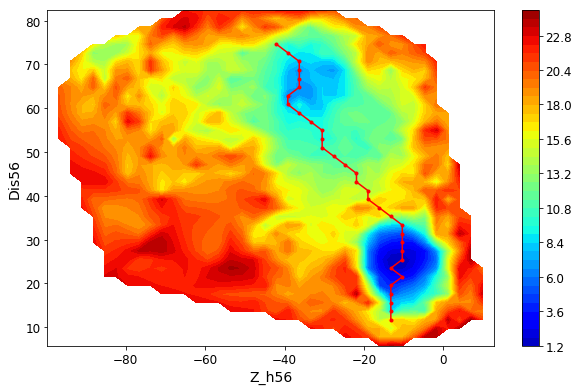

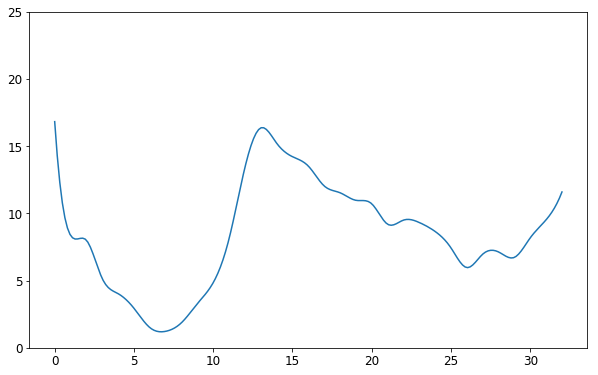

In [142]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/second_half/_280-350/56_z_dis/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(35,20), end=(3, 30),save=False, xlabel="Z_h56", ylabel="Dis56", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

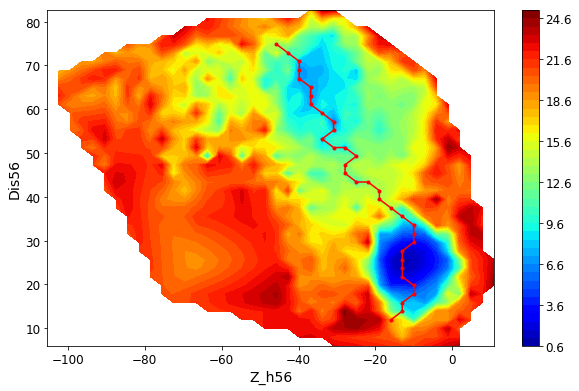

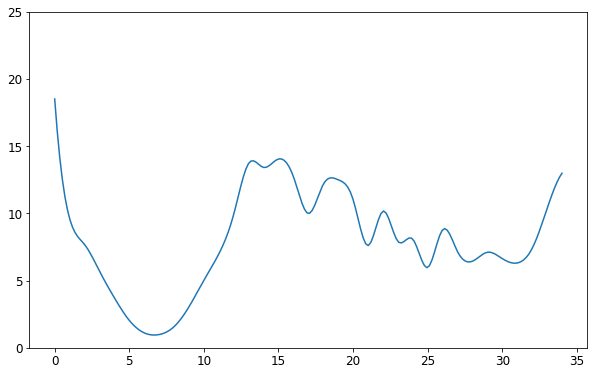

In [141]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/first_half/_280-350/56_z_dis/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(35,20), end=(3, 30),save=False, xlabel="Z_h56", ylabel="Dis56", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

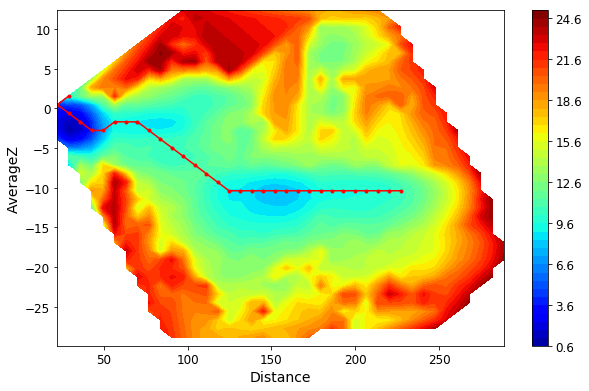

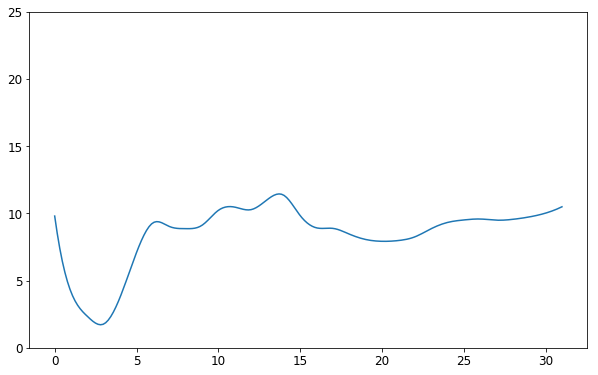

In [10]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 340
location = pre + "/combined/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

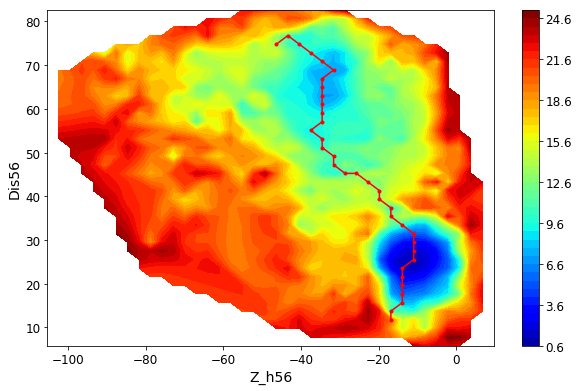

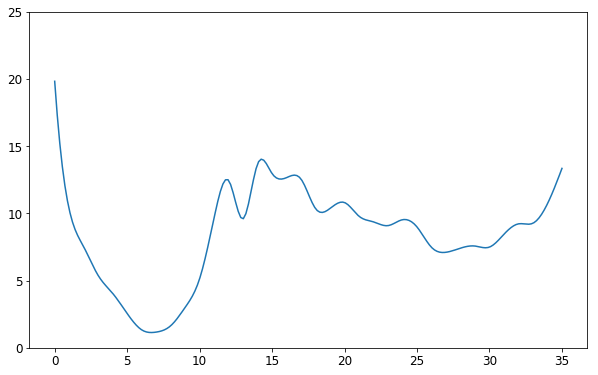

In [81]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 370
location = pre + "/combined/_280-350/56_z_dis/force_0.1/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(35,20), end=(3, 30),save=False, xlabel="Z_h56", ylabel="Dis56", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

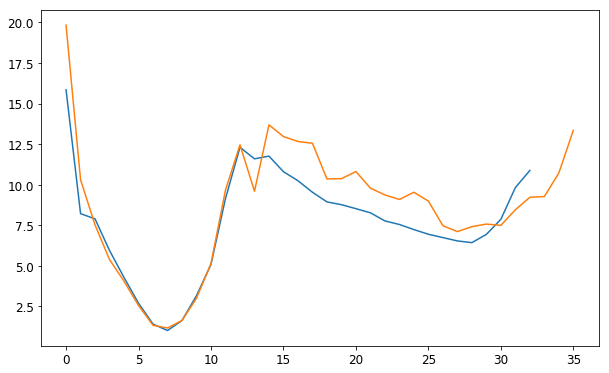

In [83]:
plt.plot(f_origin_2)
plt.plot(f_origin)

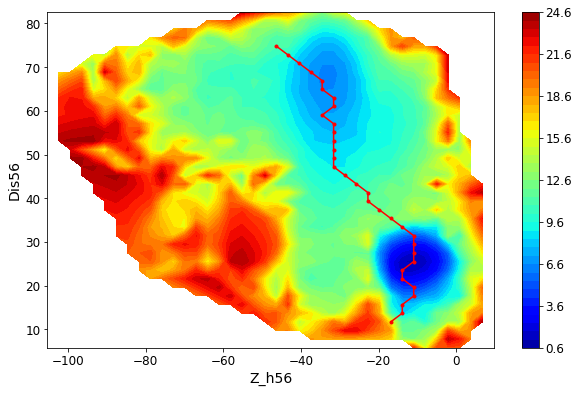

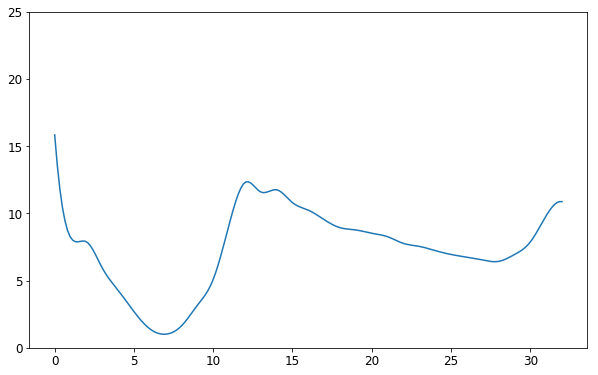

In [76]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 340
location = pre + "/combined/_280-350/56_z_dis/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
zmax=25
res=40
path_origin_2, f_origin_2 = shortest_path_2(location2, start=(35,20), end=(3, 30),save=False, xlabel="Z_h56", ylabel="Dis56", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

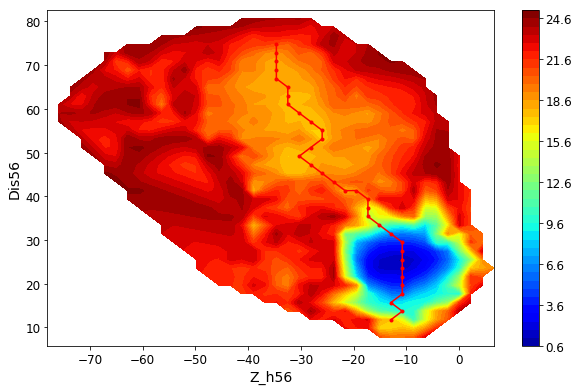

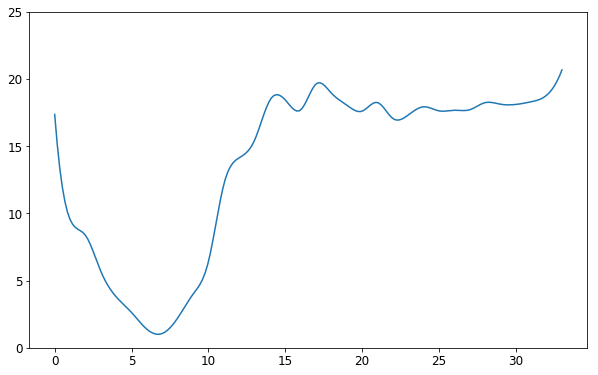

In [15]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 340
location = pre + "/combined/_280-350/56_z_dis/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(35,20), end=(3, 30),save=False, xlabel="Z_h56", ylabel="Dis56", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/aug_2018/01_week/freeEnergy/all_data_folder/second_start_extended_combined_may19.feather")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5d5d17f0>]], dtype=object)

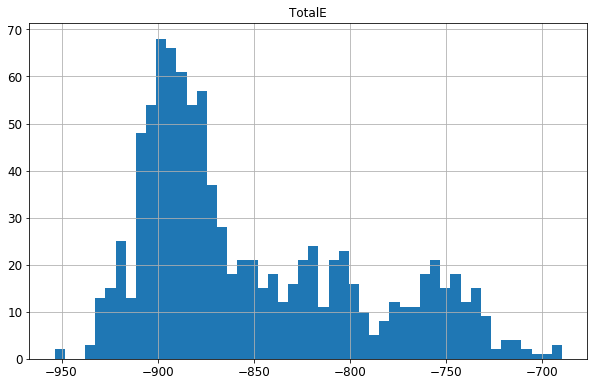

In [21]:
data.query("TempT != 417 and DisReal > 50 \
           and DisReal < 63 and z_average < -2.5 and z_average > -3.5").\
        query("Lipid1 < -0.5 and Lipid7 <  -0.5").hist("TotalE",bins=50)

In [5]:
a.columns

Index(['level_0', 'AMH', 'AMH-Go', 'AMH_3H', 'AMH_4H', 'BiasTo', 'DisReal',
       'Dis_h56', 'Distance', 'Energy', 'Lipid', 'Lipid1', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Membrane', 'Qw', 'Rg', 'Run', 'Step', 'Temp', 'TempT', 'TotalE',
       'abs_z_average', 'index', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6'],
      dtype='object')

In [61]:
data.query("TempT == 373 and BiasTo <= 110 and Step > 7e7")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
1040000,360000,-178.321133,-412.066149,-235.338918,-292.892214,86.0,79.004676,28.346208,34.986200,-714.949919,...,0.668179,1.034435,6.755773,-1.033087,2.494844,-4.841397,-3.889325,-8.467838,-5.754722,-4.876540
1040004,360004,-177.200623,-410.571989,-235.760741,-294.325427,86.0,83.372854,18.937570,40.892598,-722.068300,...,0.801884,1.374862,6.547033,-2.802593,0.773482,-9.611948,-6.093863,-9.556687,-7.412869,-4.627857
1040008,360008,-180.879480,-407.788823,-235.803323,-294.257476,86.0,89.521842,22.380344,46.390928,-709.820249,...,0.645107,2.179880,7.059012,-2.171087,1.730007,-7.565345,-5.411125,-9.619961,-7.155922,-3.403780
1040012,360012,-171.128915,-409.410718,-233.914608,-289.781585,86.0,83.579512,21.361462,38.329813,-702.409638,...,0.808295,1.102991,6.581213,-0.585338,3.456519,-5.765632,-2.172227,-7.773421,-3.901099,-3.266604
1040016,360016,-171.690895,-401.386354,-231.802732,-283.413267,86.0,81.770035,25.603405,36.290812,-666.730519,...,0.890132,1.092686,6.349323,-0.737092,4.747721,-7.508631,-2.545017,-8.130889,-5.948760,-2.941567
1040020,360020,-175.212562,-411.063653,-238.114432,-294.465943,86.0,77.052335,23.153542,45.458047,-669.801538,...,0.653753,0.887969,5.381157,-2.722350,-0.396683,-6.997332,-3.931108,-10.986878,-8.555905,-6.895371
1040024,360024,-175.051816,-412.711876,-238.117980,-294.301467,86.0,74.364323,23.750555,34.865682,-692.663837,...,0.777575,1.194753,5.701887,-2.527804,-2.874243,-7.025268,-4.092978,-8.792953,-5.815720,-4.356905
1040028,360028,-175.528304,-416.805217,-237.790195,-291.876143,86.0,80.122468,24.758321,30.863065,-685.537891,...,1.139500,1.076961,6.526219,-1.517133,0.844767,-8.072552,-3.069387,-9.641124,-3.768143,-5.261024
1040032,360032,-181.120685,-412.380862,-238.466680,-295.650334,86.0,86.451046,24.091012,45.483044,-729.879618,...,1.204523,1.043938,5.959973,-1.920873,2.254641,-8.315136,-5.301401,-10.772393,-4.227035,-5.493539
1040036,360036,-178.814269,-416.989089,-239.063277,-299.583833,86.0,79.699798,28.826969,54.038287,-676.019765,...,0.761742,1.273970,7.347845,-1.006030,1.550467,-6.880606,-4.333249,-8.250059,-7.076709,-3.398288


In [60]:
data.query("TempT == 373 and BiasTo <= 110 and Step <= 7e7")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
680000,0,-178.627890,-433.576377,-246.583490,-305.298335,86.0,77.046868,26.215912,-62.043353,-692.687622,...,0.673049,0.919396,5.798037,-2.513710,0.375505,-9.194752,-5.344894,-10.214853,-8.348931,-6.222135
680004,4,-175.587111,-437.778327,-244.343016,-306.057510,86.0,84.641804,28.340007,-69.407894,-698.237107,...,1.344175,0.593261,6.502283,-1.902340,-0.608567,-5.746729,-5.571338,-9.711419,-4.282059,-7.395059
680008,8,-165.881609,-423.144257,-234.028768,-292.861082,86.0,74.876910,25.385569,-64.309426,-749.615666,...,1.215953,0.602852,8.183012,-1.017174,0.798023,-5.607535,-4.058465,-7.780378,-2.954611,-5.257975
680012,12,-167.368034,-414.262203,-234.216790,-291.858831,86.0,81.477400,26.715844,-68.012403,-726.209605,...,0.865621,0.713431,7.213472,-1.083818,-0.083613,-6.680219,-3.086740,-7.537329,-2.432568,-4.509047
680016,16,-168.401126,-419.798745,-235.924695,-289.758702,86.0,86.972885,26.873403,-71.062836,-741.797971,...,0.672385,1.019587,6.424920,-1.817486,0.078821,-9.732506,-2.095835,-8.339287,-4.815011,-4.539695
680020,20,-168.417105,-414.268271,-234.798836,-293.403483,86.0,80.572839,26.894212,-65.131907,-708.509981,...,0.640655,1.520420,8.424260,-3.195074,-0.529479,-11.319999,-4.137169,-9.983859,-10.795163,-4.576906
680024,24,-177.606832,-426.642247,-244.850904,-302.197238,86.0,82.270854,24.647507,-55.766106,-738.639350,...,1.323559,1.055352,8.960091,-2.046927,-0.972552,-10.169295,-2.807205,-9.228246,-7.467926,-4.107037
680028,28,-180.459864,-439.735869,-247.435036,-305.428322,86.0,80.314097,28.569759,-55.298821,-746.464243,...,1.037181,1.447303,7.319102,-1.941985,0.159153,-8.898918,-4.028470,-10.119860,-3.383570,-4.982699
680032,32,-179.267787,-428.128942,-245.639078,-305.704172,86.0,79.921998,27.595099,-56.501167,-721.621219,...,0.533845,1.046649,6.232830,-2.497712,-3.990375,-7.887636,-4.144892,-7.916204,-6.313308,-5.585080
680037,37,-173.709175,-429.203682,-239.784664,-296.327575,86.0,86.673514,25.572349,-59.753635,-761.847772,...,0.937518,1.643031,8.069047,-1.070941,2.749444,-7.096093,-2.850150,-7.746216,-8.232665,-2.537201


In [65]:
part1 = pd.concat([data.query("BiasTo <= 110 and Step > 7e7"),data.query("BiasTo > 110 and Step > 5.5e7")])

In [66]:
part2 = pd.concat([data.query("BiasTo <= 110 and Step <= 7e7"),data.query("BiasTo > 110 and Step <= 5.5e7")])

In [121]:
part1.reset_index(drop=True).to_feather("/Users/weilu/Research/server/aug_2018/01_week/freeEnergy/all_data_folder/part1.feather")

In [122]:
part2.reset_index(drop=True).to_feather("/Users/weilu/Research/server/aug_2018/01_week/freeEnergy/all_data_folder/part2.feather")

In [98]:
data_topology = pd.read_feather("/Volumes/Wei_backup/GlpG/may_2018_back/03_week/all_data_folder/second_start_topologyrerun_5_20_May_231514.feather")

In [101]:
data_topology_pre = pd.read_feather("/Volumes/Wei_backup/GlpG/may_2018_back/03_week/all_data_folder/second_toplogy_may21.feather")

In [99]:
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}

data_topology["TempT"] = data_topology["Temp"].apply(lambda x: dic[x])
data_topology["BiasTo"] = data_topology["BiasTo"].apply(pd.to_numeric)

In [102]:
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}

data_topology_pre["TempT"] = data_topology_pre["Temp"].apply(lambda x: dic[x])
data_topology_pre["BiasTo"] = data_topology_pre["BiasTo"].apply(pd.to_numeric)

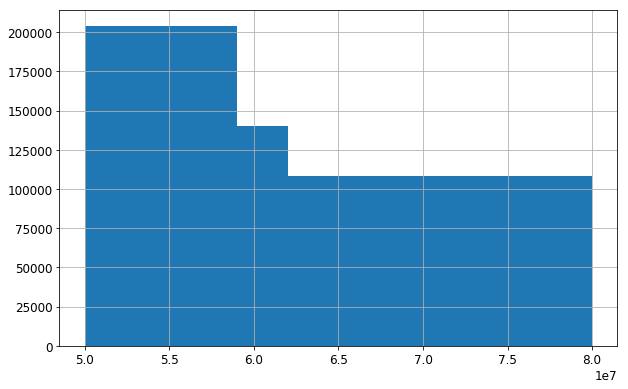

In [97]:
data["Step"].hist()

In [117]:
np.linspace(100, 340, 41)

array([ 100.,  106.,  112.,  118.,  124.,  130.,  136.,  142.,  148.,
        154.,  160.,  166.,  172.,  178.,  184.,  190.,  196.,  202.,
        208.,  214.,  220.,  226.,  232.,  238.,  244.,  250.,  256.,
        262.,  268.,  274.,  280.,  286.,  292.,  298.,  304.,  310.,
        316.,  322.,  328.,  334.,  340.])

In [111]:
data_topology_all = pd.concat([data_topology, data_topology_pre])

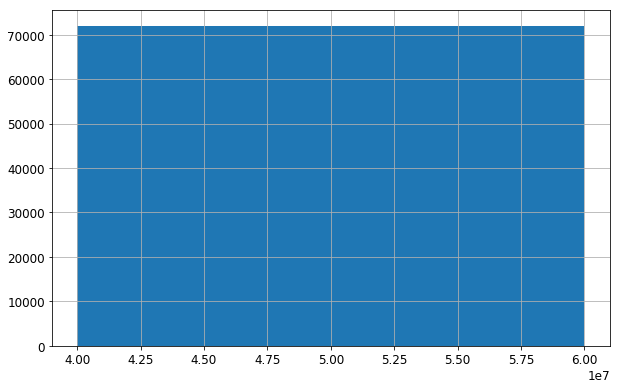

In [103]:
data_topology_pre["Step"].hist()

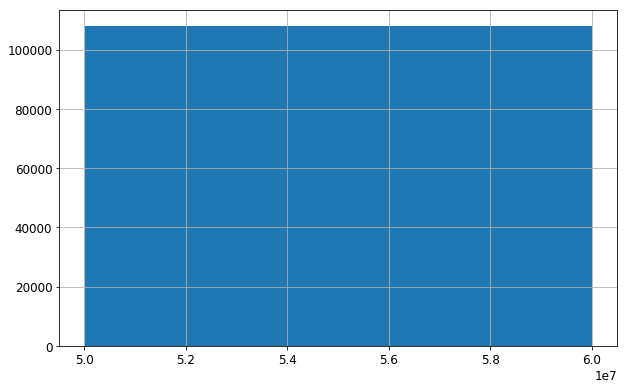

In [100]:
data_topology["Step"].hist()

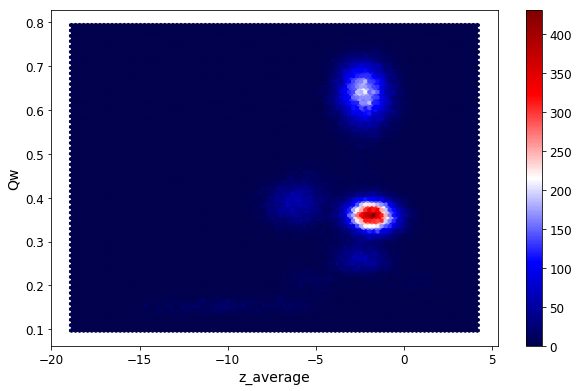

In [95]:
data_topology.query("TempT == 335").plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

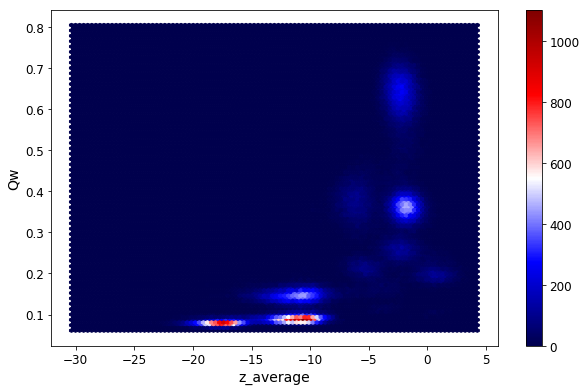

In [86]:
part1.query("TempT == 335").plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

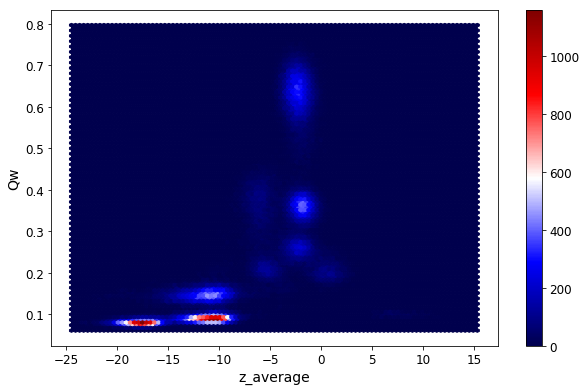

In [87]:
part2.query("TempT == 335").plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

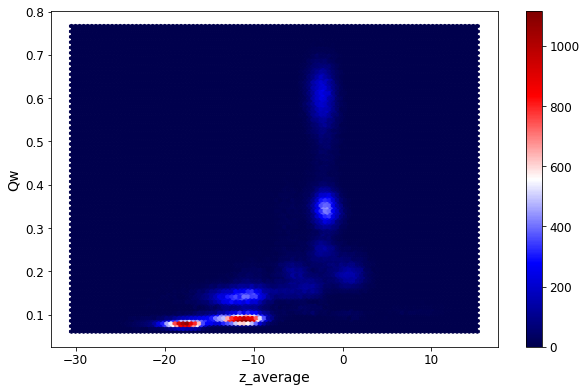

In [84]:
part1.query("TempT == 373").plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

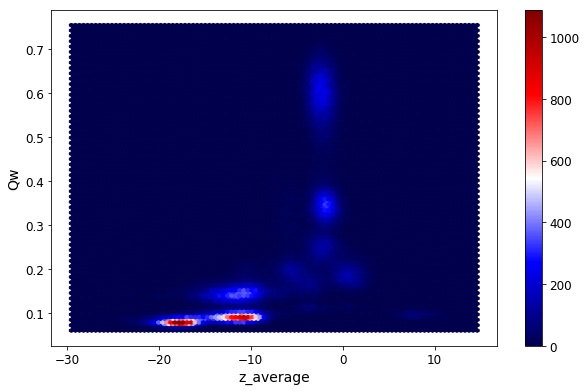

In [85]:
part2.query("TempT == 373").plot.hexbin("z_average", "Qw", cmap="seismic", sharex=False)

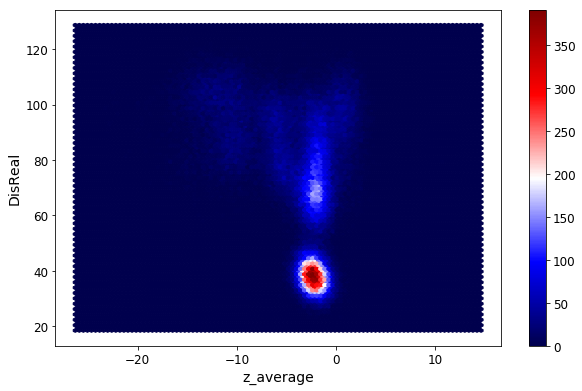

In [62]:
data.query("TempT == 373 and BiasTo <= 110 and Step <= 7e7").plot.hexbin("z_average", "DisReal", cmap="seismic", sharex=False)

In [ ]:
data.query("TempT == 373 and BiasTo < ").plot.hexbin("z_average", "DisReal", cmap="seismic", sharex=False)

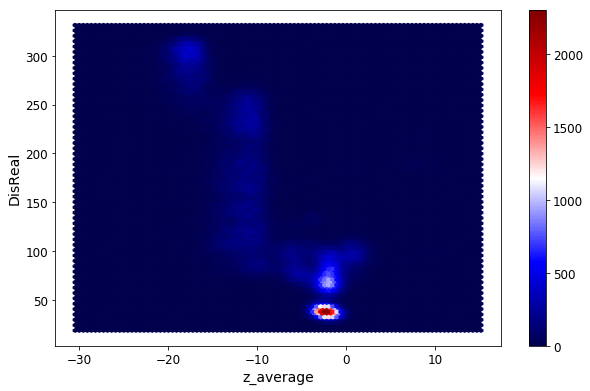

In [24]:
data.query("TempT == 373").plot.hexbin("z_average", "DisReal", cmap="seismic", sharex=False)

In [ ]:
data.plot.hexbin("Qw", "BiasedEnergy", cmap="seismic", sharex=False)

In [20]:
data.plot.hexbin("Qw", "BiasedEnergy", cmap="seismic", sharex=False)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
0,2,NaN,-379.148448,NaN,-293.851227,154.0,143.058540,69.711825,128.695515,-749.055518,...,1.956153,0.049067,4.030620,-10.697500,0.293701,-8.314213,-24.950958,-22.767507,-13.396043,-20.261706
1,3,NaN,-391.029001,NaN,-304.318676,154.0,155.769889,71.728932,-11.712890,-829.560495,...,1.606369,0.155952,3.290609,-9.732590,-0.358111,-6.341261,-23.181296,-22.302062,-12.660480,-18.502729
2,6,NaN,-363.446509,NaN,-281.031500,154.0,158.979235,67.217110,-155.038714,-694.155744,...,2.347773,0.831679,4.898764,-9.700146,0.401878,-7.492871,-23.159413,-26.033700,-7.668875,-18.479031
3,11,NaN,-361.015236,NaN,-275.708559,154.0,157.977030,69.591612,68.672889,-615.805485,...,2.198832,0.051714,3.602357,-10.315623,1.509482,-7.803889,-25.095741,-24.129020,-12.041743,-19.436537
4,14,NaN,-381.507444,NaN,-294.193657,154.0,140.499767,64.592401,129.825200,-761.720212,...,1.409658,0.005059,2.740206,-11.618918,-2.305991,-7.831763,-26.200711,-23.127587,-13.930792,-22.040452
5,15,NaN,-387.069432,NaN,-303.637469,154.0,154.654845,70.238808,-16.937939,-839.251167,...,1.226198,0.064708,2.827011,-10.505651,-1.315608,-6.482535,-24.275326,-21.388367,-14.020198,-20.731112
6,18,NaN,-368.386318,NaN,-280.637399,154.0,149.907110,65.186854,-147.117606,-672.449483,...,1.604890,0.290834,3.410223,-10.090597,-3.431608,-5.915535,-25.944815,-26.794577,-9.177802,-18.509398
7,23,NaN,-366.233841,NaN,-283.537719,154.0,156.380264,65.769387,63.411148,-585.507719,...,1.540535,0.149440,3.012327,-11.182451,-3.218628,-5.954479,-25.724560,-24.124372,-13.395186,-21.000627
8,26,NaN,-379.181391,NaN,-292.995012,154.0,137.161147,59.675458,122.360272,-746.285175,...,2.316822,0.019471,3.853485,-10.713631,-0.579149,-8.504878,-27.673935,-22.471133,-11.983866,-20.959535
9,27,NaN,-383.172776,NaN,-300.882996,154.0,157.401288,67.545758,-28.163941,-834.167980,...,2.001552,0.227254,4.392032,-10.018806,-0.413807,-8.189500,-25.527823,-18.582207,-12.205976,-20.470501


In [13]:
perturbation_table = {3:"Decrease Go",
                      4:"Increase Go",
                        5:"Decrease Lipid",
                     6:"Increase Lipid",
                     7:"Decrease Membrane",
                     8:"Increase Membrane",
                     9:"Decrease Rg",
                     10:"Increase Rg"}
all_f = {}
all_location = {}

for i in perturbation_table:
#     print(i,perturbation_table[i])
    location_i = location + f"perturbation-{i}-pmf-{temp}.dat"
    path, f = plot_shortest_path(location_i, path_origin, save=False, 
                               xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res,
                              xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax, plot2d=False)
#     all_path[i] = path_origin
    all_f[i] = f
    all_location[i] = location_i

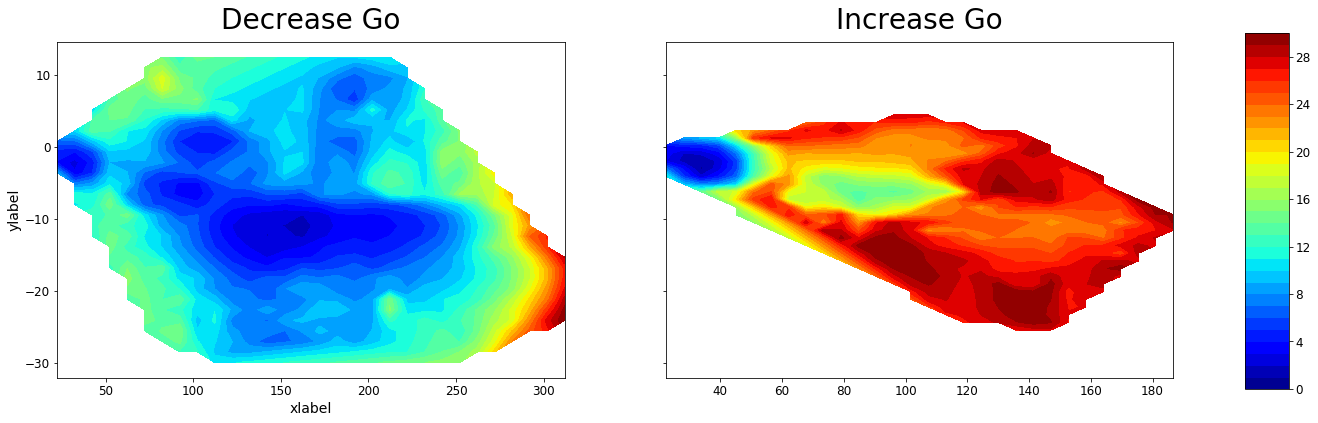

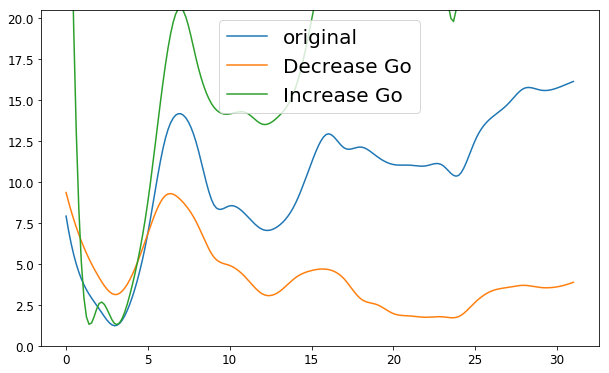

In [14]:
i = 3
j = 4
title = "Go"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

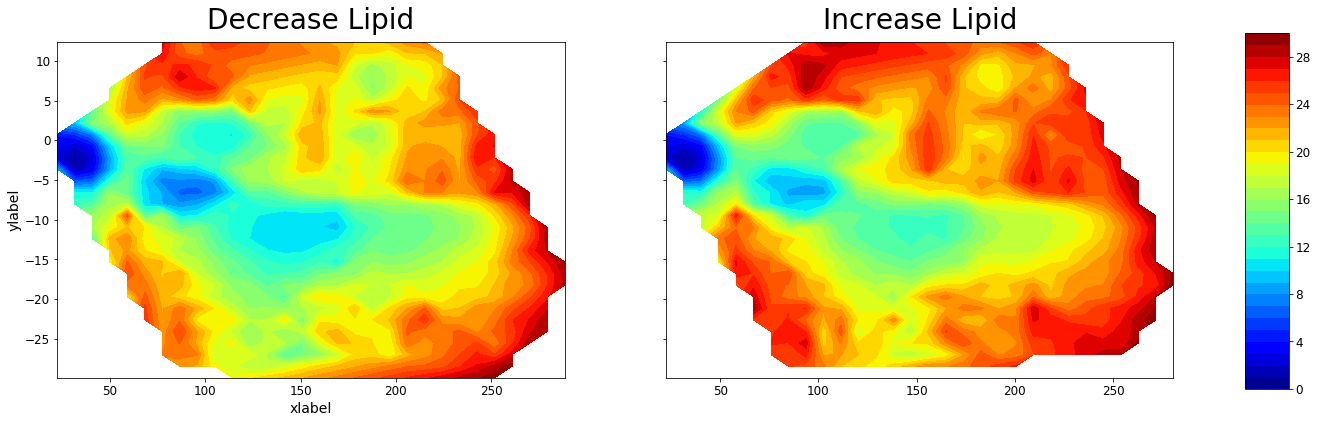

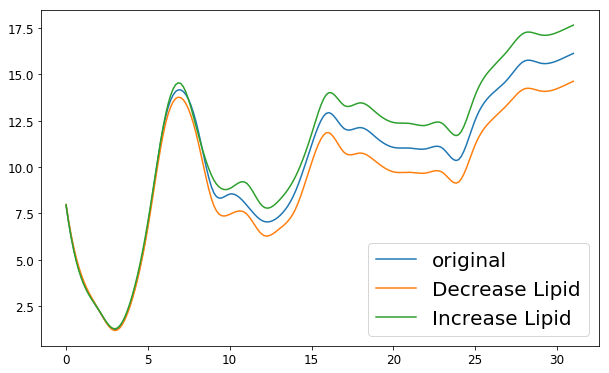

In [15]:
i = 5
j = 6
title = "Lipid"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
# plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

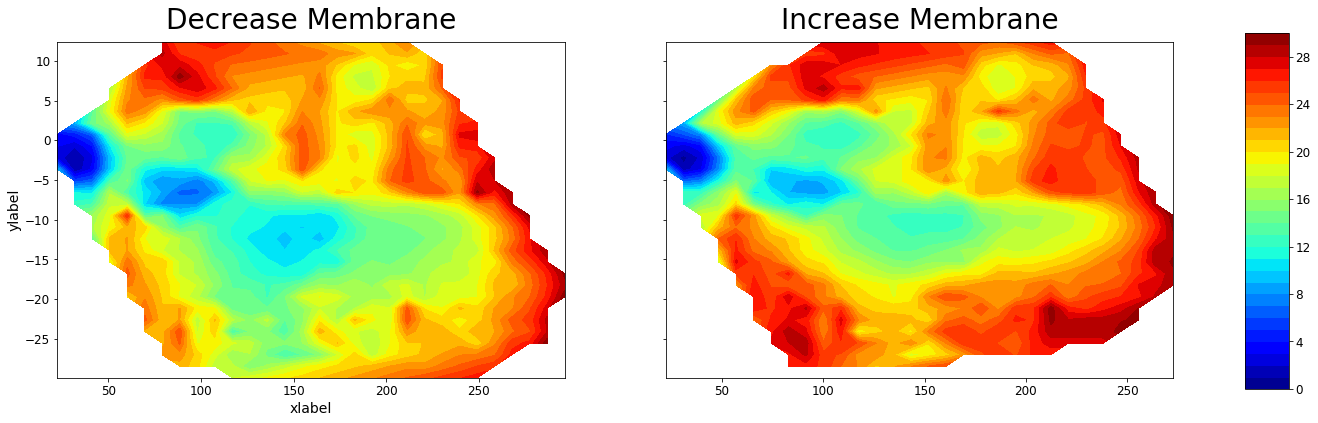

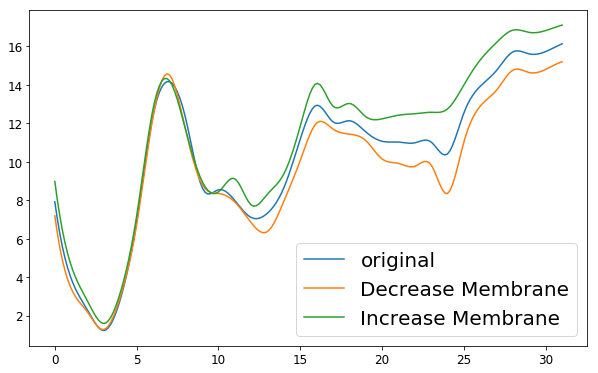

In [16]:
i = 7
j = 8
title = "Membrane"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
# plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

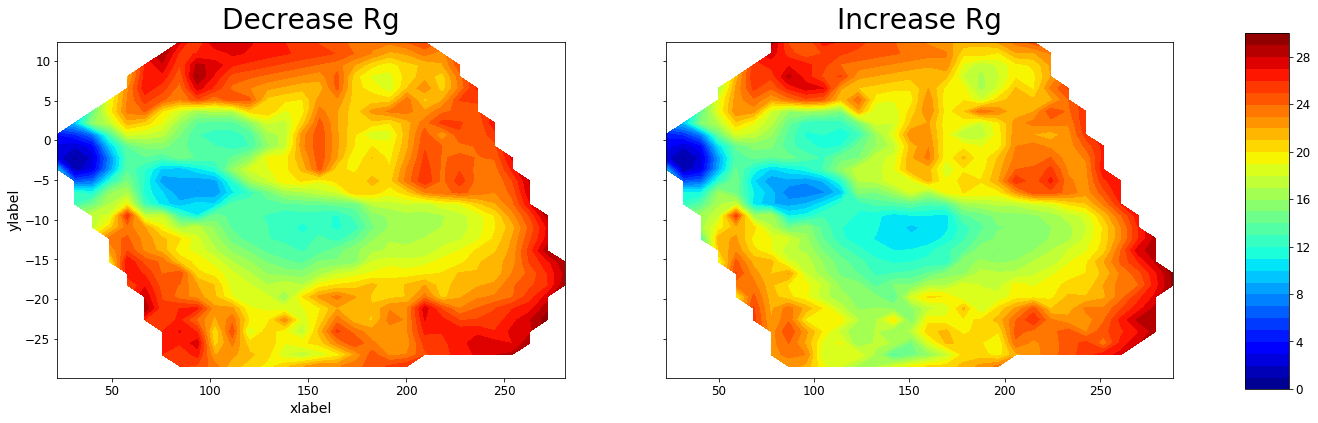

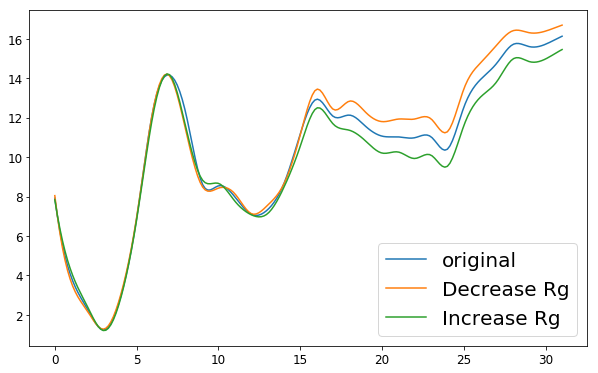

In [17]:
i = 9
j = 10
title = "Rg"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
# plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

# High force

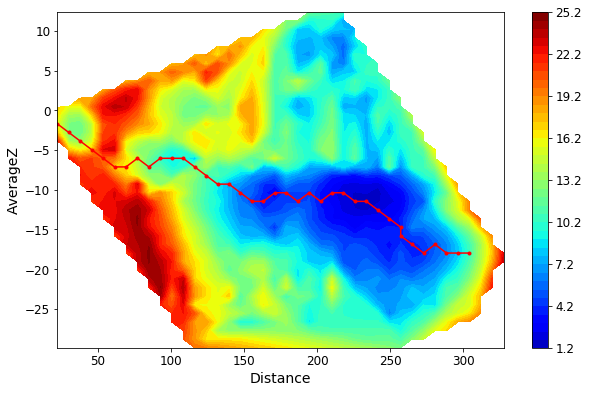

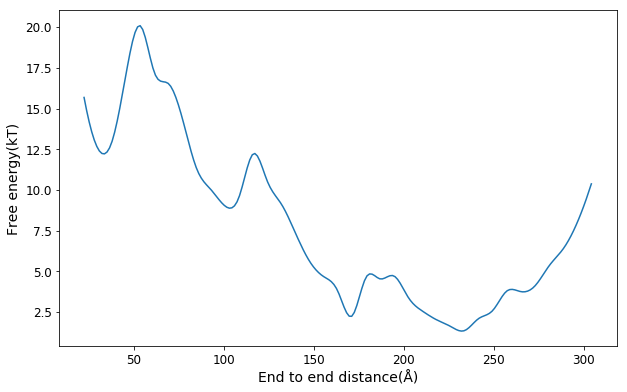

In [148]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/higer_force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(11, 36), end=(26,0),save=False, plot1d=2, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

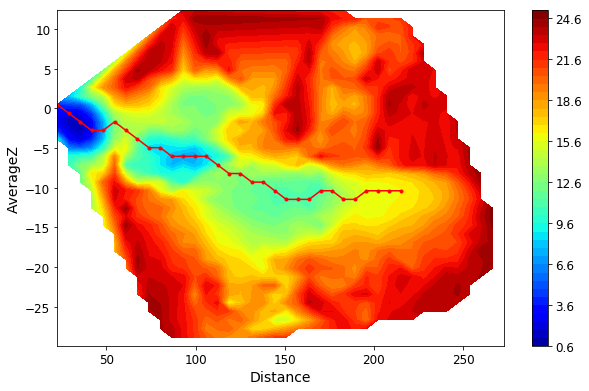

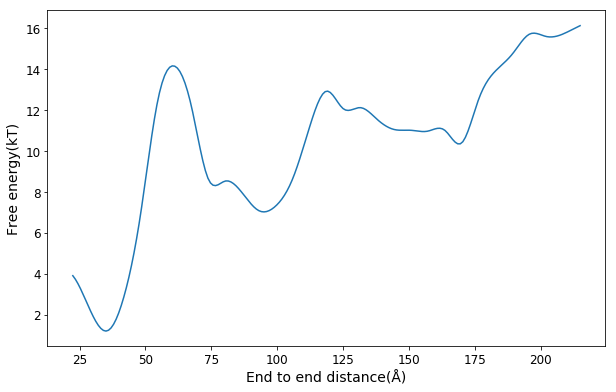

In [149]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(28,0),save=False, plot1d=2,xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

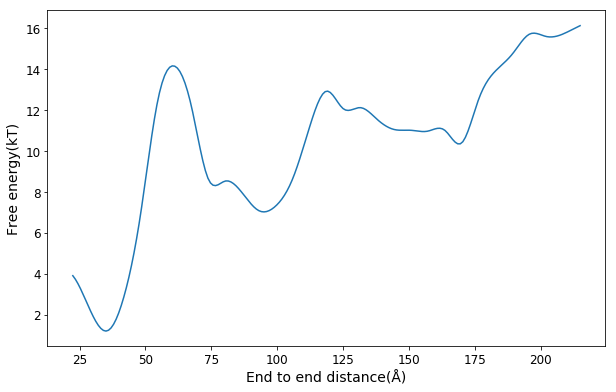

In [67]:
data = np.loadtxt(location2)
zmin = 0
z =3
xi, yi, zi = getxyz(data, zmin=zmin, zmax=zmax,res=res, z=z)
# V = ma.masked_array(zi, zi>40)
# zi = np.where(np.isnan(zi), 1e6, zi)
f_on_path = [zi[tuple(p)] for p in reversed(path_origin)]
distance_on_path = [xi[tuple(p)[1]] for p in reversed(path_origin)]
distance_on_path = np.array(distance_on_path)
x = np.arange(len(distance_on_path))
x_smooth = np.linspace(distance_on_path.min(), distance_on_path.max(), 200)
spl1 = scipy.interpolate.interp1d(distance_on_path, f_origin, kind="cubic")
plt.plot(x_smooth, spl1(x_smooth))
plt.xlabel("End to end distance(Å)")
plt.ylabel("Free energy(kT)")
# plt.ylim([0,20])
plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/freeEnergy_Distance.png")

# Enhance Go term

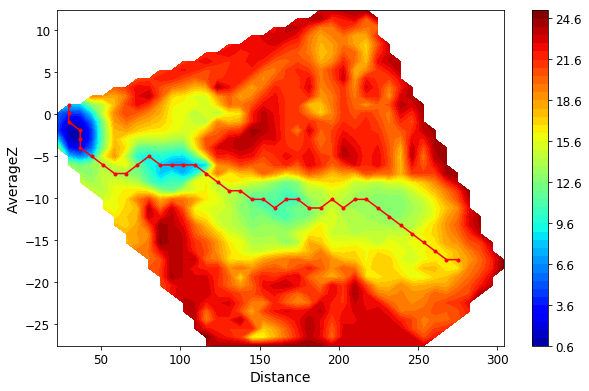

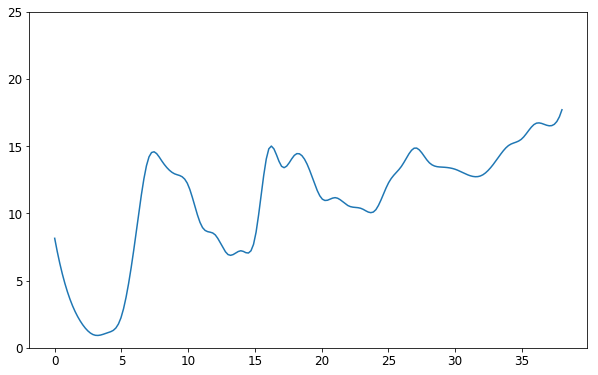

In [14]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/enhance_go/_280-350/2d_zAverage_dis/force_0.18/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(10, 35), end=(28,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

In [15]:
perturbation_table = {3:"Decrease 10% Lipid",
                      4:"Increase 10% Lipid",
                        5:"Decrease 20% Lipid",
                     6:"Increase 20% Lipid",
                     7:"Decrease Membrane",
                     8:"Increase Membrane",
                     9:"Decrease Rg",
                     10:"Increase Rg"}
all_f = {}
all_location = {}

for i in perturbation_table:
#     print(i,perturbation_table[i])
    location_i = location + f"perturbation-{i}-pmf-{temp}.dat"
    path, f = plot_shortest_path(location_i, path_origin, save=False, 
                               xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res,
                              xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax, plot2d=False)
#     all_path[i] = path_origin
    all_f[i] = f
    all_location[i] = location_i

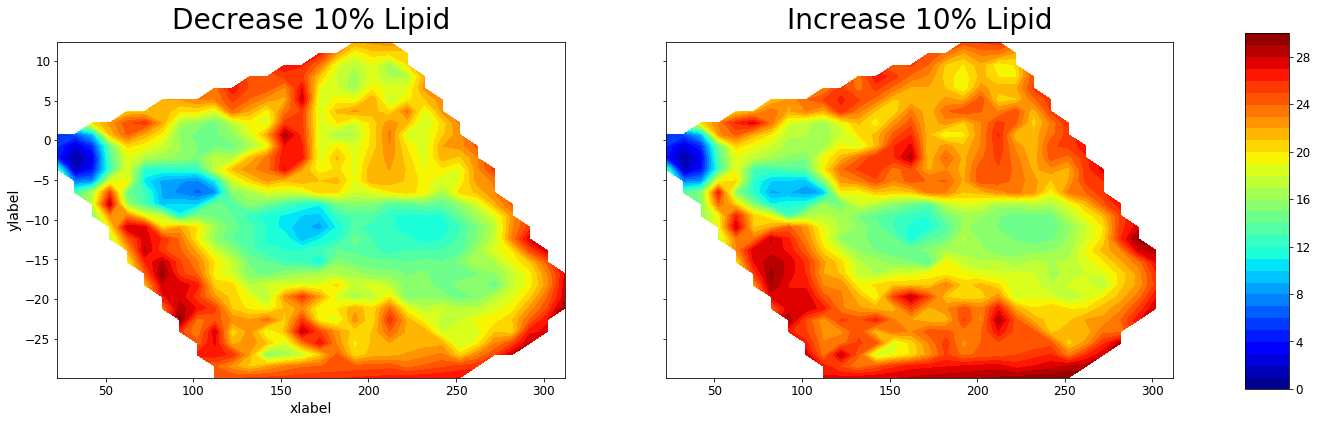

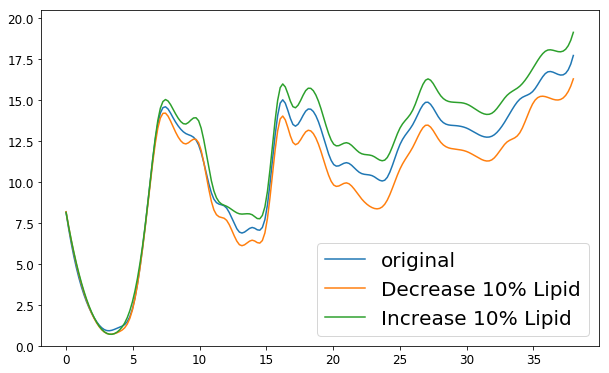

In [16]:
i = 3
j = 4
title = "Lipid"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

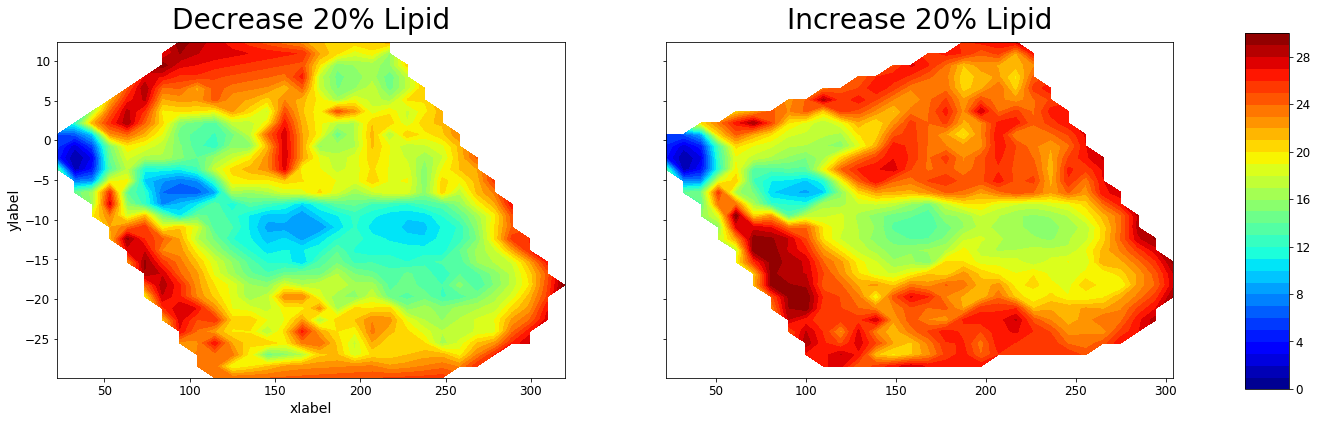

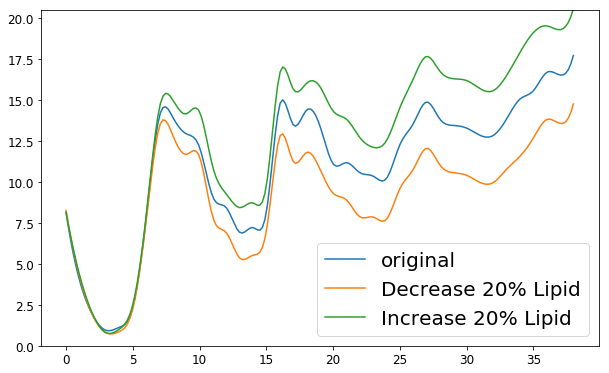

In [17]:
i = 5
j = 6
title = "Lipid"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

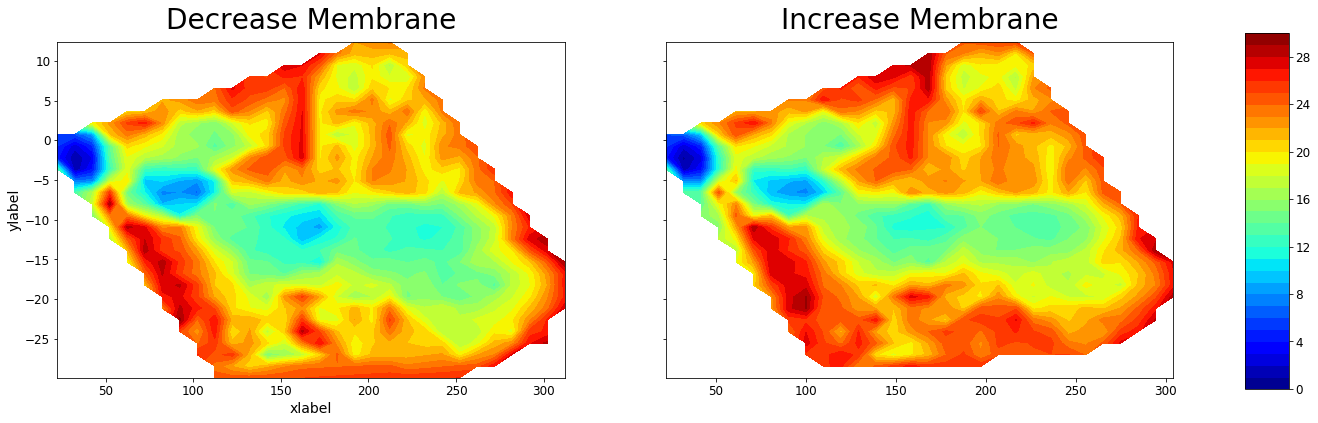

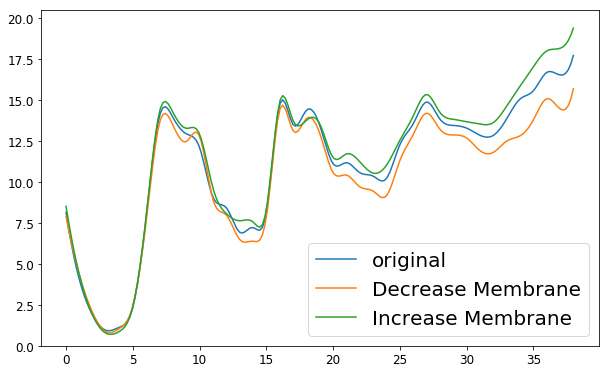

In [18]:
i = 7
j = 8
title = "Membrane"
plot2d_side_by_side(all_location[i], all_location[j], title1=perturbation_table[i], title2=perturbation_table[j])
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_compare.png", dpi=300)
plt.figure()
x = np.arange(len(f_origin))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_origin, kind="cubic")

plt.plot(x_smooth, spl(x_smooth), label="original")

spl = scipy.interpolate.interp1d(x, all_f[i], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[i])

spl = scipy.interpolate.interp1d(x, all_f[j], kind="cubic")
plt.plot(x_smooth, spl(x_smooth), label=perturbation_table[j])
plt.ylim([0,20.5])
plt.legend(prop={'size': 20})
# plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/{title}_1d.png", dpi=300)

In [128]:
data = pd.read_feather("/Volumes/Wei_backup/GlpG/may_2018_back/03_week/all_data_folder/secondrerun_7_19_May_155517.feather")

In [131]:
data.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'AMH', 'AMH_3H', 'AMH_4H', 'Distance', 'AMH-Go', 'Membrane',
       'Rg', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid',
       'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7',
       'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11', 'Lipid12', 'Lipid13',
       'Lipid14', 'Lipid15', 'TotalE', 'BiasTo'],
      dtype='object')

In [132]:
data_all = pd.read_feather("/Volumes/Wei_backup/GlpG/may_2018_back/03_week/all_data_folder/second_start_extended_combined_may19.feather")

In [138]:
data_all.query("Step > 7e7")

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,rg5,rg6,rg_all,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6
1040000,360000,-178.321133,-412.066149,-235.338918,-292.892214,86.0,79.004676,28.346208,34.986200,-714.949919,...,0.668179,1.034435,6.755773,-1.033087,2.494844,-4.841397,-3.889325,-8.467838,-5.754722,-4.876540
1040001,360001,-188.299728,-447.198046,-252.309590,-312.801516,86.0,76.611795,26.503922,66.355478,-863.891967,...,0.826445,1.772088,6.904373,-0.743387,1.148260,-5.227564,-1.425519,-9.043892,-5.895529,-4.493921
1040002,360002,-171.687394,-407.066513,-237.428319,-289.086674,86.0,77.891836,27.000805,50.752370,-629.877271,...,1.908471,1.135514,7.790810,-1.308511,0.446359,-7.046833,-3.049219,-8.155064,-5.602625,-3.843632
1040003,360003,-180.758189,-431.130772,-243.949674,-303.135304,86.0,76.310309,23.970832,76.250721,-808.283812,...,0.805586,1.362957,6.343286,-0.404976,0.186463,-5.939964,-1.582849,-8.324221,-4.780361,-2.786373
1040004,360004,-177.200623,-410.571989,-235.760741,-294.325427,86.0,83.372854,18.937570,40.892598,-722.068300,...,0.801884,1.374862,6.547033,-2.802593,0.773482,-9.611948,-6.093863,-9.556687,-7.412869,-4.627857
1040005,360005,-189.560915,-455.080660,-252.741874,-315.285649,86.0,77.138549,23.965611,67.909113,-875.315412,...,0.626170,1.227854,6.671891,-2.526055,0.828463,-8.453980,-2.390166,-10.600602,-9.344658,-5.994914
1040006,360006,-165.960261,-394.927103,-228.087408,-282.374683,86.0,81.804196,22.570860,46.997684,-617.038543,...,1.515393,1.330794,7.078147,-2.516296,2.376668,-9.006004,-5.647366,-11.014686,-7.808930,-6.237744
1040007,360007,-183.028184,-435.242788,-244.838200,-308.013220,86.0,79.692817,24.642406,79.354488,-815.887543,...,0.674458,1.409087,7.566555,-2.113954,1.318628,-8.127702,-2.632928,-10.117539,-6.694920,-6.331474
1040008,360008,-180.879480,-407.788823,-235.803323,-294.257476,86.0,89.521842,22.380344,46.390928,-709.820249,...,0.645107,2.179880,7.059012,-2.171087,1.730007,-7.565345,-5.411125,-9.619961,-7.155922,-3.403780
1040009,360009,-187.553033,-450.997601,-252.023328,-313.843100,86.0,80.956135,25.333072,69.330618,-871.712350,...,0.758550,1.127856,6.378650,-1.968650,2.601144,-7.283513,-3.448582,-10.006650,-5.816201,-4.557311
